In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

from laser_tools import pulse, goggles

In [2]:
goggles.available()

['DBY.csv', 'C1033.csv', 'C1023.csv', 'T5H03.csv', 'T5H05.csv']

In [2]:
spectrum_data = np.loadtxt("/Users/mattbain/OneDrive - SLAC National Accelerator Laboratory/Laser Safety/Heinz_Lab/SOP_2025/ASC_400_uJ_Carbide_MPC_static.csv", delimiter=",", encoding='utf-8-sig')

spectrum_wavelengths = spectrum_data[:,0]
spectrum_intensities = spectrum_data[:,1]

mypulse = pulse.from_spectrum(spectrum_wavelengths, spectrum_intensities, 8192, 1E-16)

print("Here ", mypulse.energy)

Here  0.00035309569722103594


/Users/mattbain/code/laser_tools/laser_tools/pulse.py:250: RuntimeWarning: invalid value encountered in sqrt
  pulse.Ef = np.nan_to_num(np.sqrt(spectrum_interpolator(pulse.frequency_axis)), posinf=0, neginf=0)


0.00035309569722103594
Here
0.0003531017838730463


/Users/mattbain/code/laser_tools/laser_tools/pulse.py:205: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(np.divide(const.c, value), neginf=0, posinf=0)


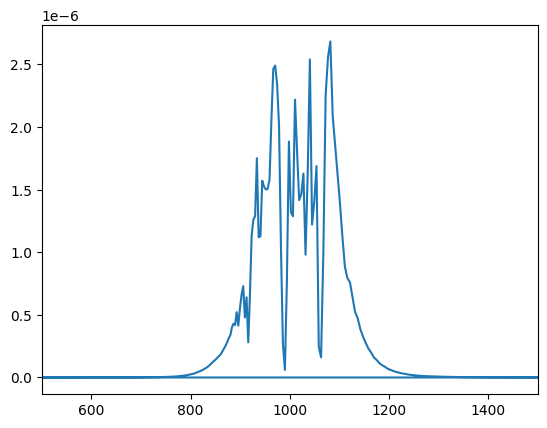

In [3]:
spec_data = mypulse.get_spectrum('Hz')

print(np.trapezoid(spec_data["intensities"],x=spec_data["xvals"]))

import scipy.constants as const

#hzax = mypulse.frequency_axis
#ghzax = hzax*1E9

#nms = np.divide(const.c, ghzax)
#print(ms)
#plt.plot(mypulse.frequency_axis, ms)
#plt.show()
spec_data_nm = mypulse.get_spectrum('nm')

#print(spec_data_nm["xvals"][:-2])

#x = np.linspace(0, len(spec_data_nm["xvals"]), len(spec_data_nm["xvals"]))

#plt.scatter(x[:-2], spec_data_nm["xvals"][:-2])
#plt.ylim([4E-8, 0])
#plt.show()

print(np.trapezoid(spec_data_nm["intensities"] ,x=spec_data_nm["xvals"]))

#print(np.trapezoid(np.divide(spec_data_nm["intensities"], 1) ,x=(spec_data_nm["xvals"])))

plt.plot(spec_data_nm["xvals"], spec_data_nm["intensities"])
plt.xlim([500, 1500])
plt.show()

In [4]:
print(spec_data_nm["xvals"])

[5.99584916e-008 5.99731335e-008 5.99877825e-008 ... 1.22794991e-004
 2.45589982e-004 1.79769313e+308]


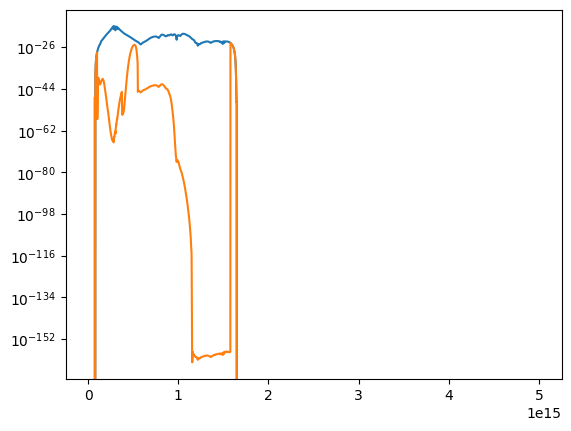

In [5]:
C1033 = goggles.C1033()

attenuated_pulse = C1033.attenuate_pulse(mypulse)

plt.plot(mypulse.frequency_axis, mypulse.If)
plt.plot(attenuated_pulse.frequency_axis, attenuated_pulse.If)
plt.yscale('log')
plt.show()